## Observations and Insights

## Dependencies and starter code

In [453]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how='right', on="Mouse ID")
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [454]:
mouse_df.describe()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Summary statistics

In [455]:
# Generate a summary statistics table of 
#mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

summary = mouse_df.describe()


sum2 = pd.DataFrame(summary["Tumor Volume (mm3)"])
sum2 = sum2.loc[["mean","std"], :]
tumors = mouse_df['Tumor Volume (mm3)']

additional = {"variance": tumors.var(),
              "standard_error_mean": tumors.sem()}
additional = pd.DataFrame.from_dict(additional, orient="index", columns=["Tumor Volume (mm3)"])


true_final_summary_table = sum2.append(additional)

true_final_summary_table = round(true_final_summary_table,2)

true_final_summary_table


,Tumor Volume (mm3)
mean,50.45
std,8.89
variance,79.12
standard_error_mean,0.20


## Bar plots

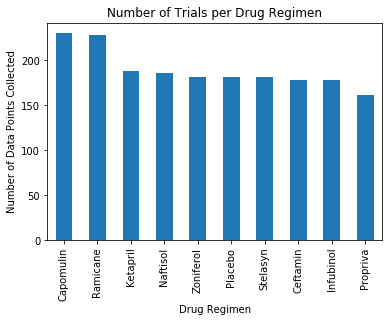

In [456]:
#### Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_series = mouse_df["Drug Regimen"].groupby(mouse_df["Drug Regimen"]).count()

treatment_groups = pd.DataFrame(drug_series)
treatment_groups = treatment_groups.rename(columns={"Drug Regimen": "Number of Mice"})
treatment_groups = treatment_groups.sort_values("Number of Mice", axis=0, ascending=False)



treatment_bp = treatment_groups.plot.bar(legend = False, title = "Number of Trials per Drug Regimen")
treatment_bp.set_ylabel("Number of Data Points Collected")

treatment_groups = treatment_groups.reset_index()

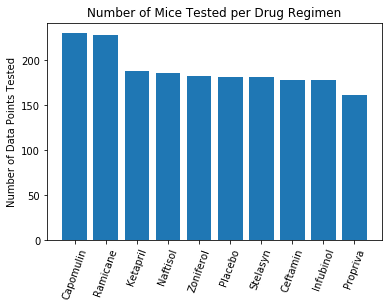

In [457]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


#bp, ax = plt.subplots()

bp = plt.bar(treatment_groups["Drug Regimen"], treatment_groups["Number of Mice"])
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Data Points Tested")
plt.xticks(rotation=70)
plt.show()


## Pie plots

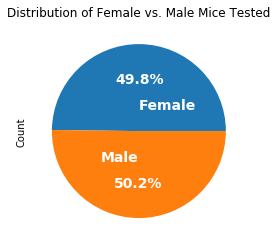

In [458]:
# Generate a pie plot showing the distribution of 
#female versus male mice using pandas

mousesex = mouse_df.groupby(["Sex", "Mouse ID"])["Sex"].count()
mousesex = pd.DataFrame(mousesex)
mousesex = mousesex.rename(columns = {"Sex": "Number of Data Readings"})
mousesex = mousesex.reset_index(drop=False)

mousecount = mousesex.groupby(["Sex"])["Number of Data Readings"].count()
mousecount_df=pd.DataFrame(mousecount)
mousecount_df.rename(columns={"Number of Data Readings": "Count"}, inplace=True)
mousecount_df.reset_index(drop=False, inplace=True)


#PIE PLOT WITH PANDAS
labels = mousecount_df["Sex"]
category = mousecount_df["Count"]

mousecountplot = mousecount_df.plot(kind="pie", y="Count", labels=labels, labeldistance=0.3, legend=False, 
                                    title="Distribution of Female vs. Male Mice Tested", autopct='%1.1f%%', 
                                    textprops={"fontsize":14, "c":"white", "weight":"bold"})



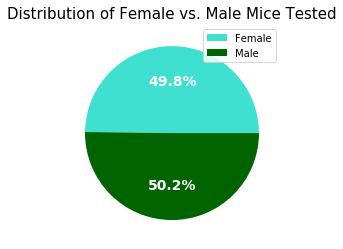

In [459]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


mousesex_df = pd.DataFrame(mousesex)
mousesex_df = mousesex_df.rename(columns={"Sex": "Count"})
mousesex_df = mousesex_df.reset_index(drop=False)
#labels = "Female", "Male"
#ms_pie = plt.pie(mousesex, labels=labels)



plt.pie(mousecount_df["Count"], 
        colors=["turquoise", "darkgreen"], autopct='%1.1f%%', textprops={"fontsize": 14, "c":"white", "weight":"bold"})
plt.title("Distribution of Female vs. Male Mice Tested", fontsize=15)
plot = plt.legend(labels=mousecount_df["Sex"], loc="upper right")

## Quartiles, outliers and boxplots

In [488]:
MaxSize_bymouse = mouse_df.groupby(["Mouse ID"]).max()
MaxSize_bymouse = MaxAmt.reset_index(drop=False)

maxtumor_bydrug = MaxSize_bymouse.groupby(["Drug Regimen"]).max()
maxtumor_bydrug = maxtumor_bydrug.sort_values(["Tumor Volume (mm3)"])

numberofdrugs = MaxAmt["Drug Regimen"].nunique()

maxtumors = maxtumor_bydrug.loc[:,["Tumor Volume (mm3)", 
                                "Timepoint", "Metastatic Sites", "Mouse ID"]]
maxtumors.reset_index(drop=False, inplace=True)
maxtumors

Ramicane = MaxSize_bymouse[MaxSize_bymouse["Drug Regimen"] == "Ramicane"]
Capomulin = MaxSize_bymouse[MaxSize_bymouse["Drug Regimen"] == "Capomulin"]
Infubinol = MaxSize_bymouse[MaxSize_bymouse["Drug Regimen"] == "Infubinol"]
Ceftamin = MaxSize_bymouse[MaxSize_bymouse["Drug Regimen"] == "Ceftamin"]

FinalTumorVolumes = MaxSize_bymouse[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
FinalTumorVolumes = FinalTumorVolumes[FinalTumorVolumes["Drug Regimen"].isin(labels) ]
FinalTumorVolumes

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
3,a275,Ceftamin,62.999356
6,a411,Ramicane,45.466677
7,a444,Ramicane,45.000000
...,...,...,...
239,y769,Ceftamin,68.594745
240,y793,Capomulin,45.000000
241,y865,Ceftamin,64.729837
245,z578,Ramicane,45.000000


In [489]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

## RAMICANE

quartiles = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("*RAMICANE TUMORS*")
print("")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-------------------------------")
print("")

## Capomulin
quartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("*CAPOMULIN TUMORS*")
print("")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-------------------------------")
print("")

## Infubinol
quartiles = Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("*INFUBINOL TUMORS*")
print("")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-------------------------------")
print("")

## Ceftamin
quartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("*CEFTAMIN TUMORS*")
print("")
print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("-------------------------------")
print("")


*RAMICANE TUMORS*

Lower Quartile: 45.0
Upper Quartile: 46.34383237
IQR: 1.3438323700000012
Median: 45.52187471 
Values below 42.984251445 could be outliers.
Values above 48.359580925 could be outliers.
-------------------------------

*CAPOMULIN TUMORS*

Lower Quartile: 45.0
Upper Quartile: 46.74900552
IQR: 1.7490055199999972
Median: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.
-------------------------------

*INFUBINOL TUMORS*

Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Median: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-------------------------------

*CEFTAMIN TUMORS*

Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Median: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-------------------------------



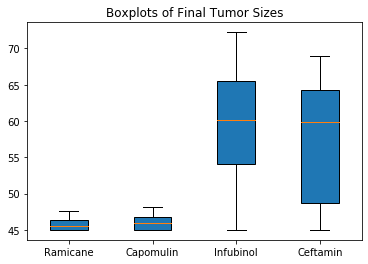

In [490]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ramtum = [x for x in Ramicanetumors["Tumor Volume (mm3)"]]
captum = [x for x in Capomulintumors["Tumor Volume (mm3)"]]
intum = [x for x in Infubinoltumors["Tumor Volume (mm3)"]]
ceftum = [x for x in Ceftamintumors["Tumor Volume (mm3)"]]


labels = ["Ramicane","Capomulin", "Infubinol", "Ceftamin"]
tumorsatend = [ramtum,captum,intum, ceftum]


fig, axes = plt.subplots(nrows=1, ncols=1)
bplot1 = axes.boxplot(tumorsatend,
                        vert=True,
                        patch_artist=True,
                        labels=labels)
plot = axes.set_title("Boxplots of Final Tumor Sizes")


## Line and scatter plots

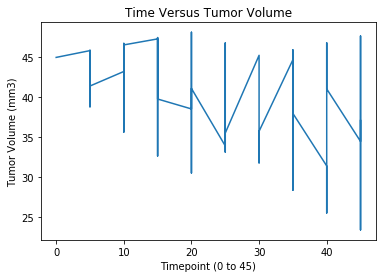

In [507]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capos = mouse_df[mouse_df["Drug Regimen"] == "Capomulin"]

capos = capos.sort_values("Timepoint", axis=0, ascending=True)
time = capos["Timepoint"]
volume = capos["Tumor Volume (mm3)"]

fig = plt.figure()
ax = plt.axes()

plt.title("Time Versus Tumor Volume")
plt.xlabel("Timepoint (0 to 45)")
plt.ylabel("Tumor Volume (mm3)")
plot = ax.plot(time, volume)

#missing sort by mouse

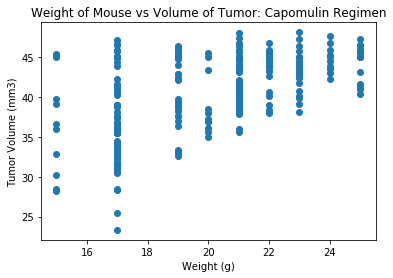

In [500]:
# Generate a scatter plot of mouse weight versus average tumor volume for the 
#Capomulin regimen

weight = capos["Weight (g)"]
volume = capos["Tumor Volume (mm3)"]

plt.title("Weight of Mouse vs Volume of Tumor: Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plot = plt.scatter(y = volume, x = weight)

In [503]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The linear regression equation is {line_eq}")

The correlation between both factors is 0.53
The linear regression equation is y = 0.96x + 21.49
